<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/NB15.%20Segmenting%20Breast%20Ultrasound%20Images%20using%20YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmenting Breast Ultrasound Images using YOLOv8

## 1. Introduction

### Importance of Ultrasound Imaging in Medicine

Ultrasound imaging is a crucial tool in modern medicine. It uses high-frequency sound waves to create images of the body's internal structures, providing detailed views without the radiation risks associated with other imaging techniques like X-rays or CT scans. Ultrasound is widely used to examine organs, tissues, and blood vessels, and to monitor fetal development during pregnancy.

**Key Importance:**
1. **Non-invasive Diagnostics:** Allows evaluation of various medical conditions without invasive procedures.
2. **Treatment Monitoring:** Helps doctors assess the effectiveness of treatments in real time.
3. **Procedure Guidance:** Used to guide procedures like biopsies or targeted treatments.

For more detailed information, visit [this page from the National Institute of Biomedical Imaging and Bioengineering (NIH)](https://www.nibib.nih.gov/science-education/science-topics/ultrasound).

### Applications of AI and Deep Learning in Ultrasound Medical Image Analysis

Artificial Intelligence (AI) and deep learning are transforming the field of medical image analysis. These technologies can assist in several areas:

1. **Automated Detection and Diagnosis:** Algorithms can detect anomalies and diseases with high accuracy, sometimes even outperforming human diagnosticians.
2. **Quantitative Analysis:** Capable of automatically quantifying features in images, such as tumor size, which is crucial for monitoring diseases.
3. **Reduced Diagnosis Time:** Automating certain aspects of image analysis can significantly reduce the time medical professionals spend interpreting images.

For more details on how AI is changing medical image analysis, explore [this article from Nature](https://www.nature.com/articles/d41586-019-03845-1).

### Instance Segmentation vs Semantic Segmentation

Instance segmentation and semantic segmentation are two distinct tasks in the field of computer vision. Both involve classifying pixels in an image, but they differ in the level of detail and specificity of the classification. Here's a detailed comparison:


#### Semantic Segmentation

**Definition:**
- Semantic segmentation involves classifying each pixel in an image into a predefined set of classes or categories. All pixels that belong to the same class are assigned the same label.

**Key Characteristics:**
- **Class-Level Labeling:** Each pixel is labeled with a class label, but individual objects of the same class are not differentiated.
- **No Distinction Between Instances:** It doesn't distinguish between different instances of the same class. For example, all cars in an image would be labeled as "car" without identifying them as separate entities.
- **Output:** The output is a segmentation map where each pixel has a class label.

**Use Cases:**
- Autonomous driving for understanding the drivable area, identifying lanes, and detecting sidewalks.
- Medical imaging for identifying different tissue types or organs.

**Example:**
- An image with several cats and dogs would have all cat pixels labeled as "cat" and all dog pixels labeled as "dog", without distinguishing between individual cats or dogs.

#### Instance Segmentation

**Definition:**
- Instance segmentation not only classifies each pixel into a class but also distinguishes between different instances of the same class. It is a combination of object detection and semantic segmentation.

**Key Characteristics:**
- **Instance-Level Labeling:** Each pixel is labeled with both a class label and an instance label, allowing differentiation between separate objects of the same class.
- **Distinguishes Between Instances:** Identifies and segments individual objects within a class, providing a unique label to each instance.
- **Output:** The output is a segmentation map where each pixel has both a class label and an instance label, often represented as separate masks for each object.

**Use Cases:**
- Robotics for object manipulation where identifying and distinguishing between multiple objects is crucial.
- Advanced medical imaging for detecting and delineating individual cells or tumors.

**Example:**
- An image with several cats and dogs would have each cat and dog identified and labeled separately, so you would have distinct labels for "cat 1", "cat 2", "dog 1", etc.

### Comparison Table

| Aspect                     | Semantic Segmentation                            | Instance Segmentation                             |
|----------------------------|--------------------------------------------------|--------------------------------------------------|
| **Objective**              | Classify each pixel into a predefined class      | Classify each pixel and distinguish between instances |
| **Labeling**               | Class-level                                      | Instance-level (unique labels for each object)   |
| **Output**                 | Segmentation map with class labels               | Segmentation map with class and instance labels  |
| **Use Cases**              | Autonomous driving, medical imaging              | Robotics, advanced medical imaging, image editing |
| **Example**                | All cats labeled as "cat"                        | Each cat labeled separately (e.g., "cat 1", "cat 2") |

### Resources for Further Reading

1. **Papers with Code - Instance Segmentation**: A comprehensive resource with links to papers, code, and datasets related to instance segmentation. [Papers with Code - Instance Segmentation](https://paperswithcode.com/task/instance-segmentation)

2. **What is Instance Segmentation?**: An introductory guide explaining the basics and applications of instance segmentation. [What Is Instance Segmentation? A Guide](https://www.folio3.ai/blog/what-is-instance-segmentation-apps/)

3. **Semantic Segmentation vs. Instance Segmentation: Explained**: A detailed explanation of the differences between semantic and instance segmentation. [Mastering Semantic Segmentation and Instance Segmentation](https://www.ikomia.ai/blog/instance-segmentation-and-semantic-segmentation)

Understanding the distinction between semantic and instance segmentation is crucial for selecting the right approach for your specific application in computer vision.

## 2. **Setting up our workspace**

---
**Install Kaggle API Library**

---

In [ ]:
%pip install -q kaggle


---
**Upload your Kaggle API Key**

---

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


---
**Copy the API key to `~/.kaggle`**

---

In [ ]:
%mkdir -p ~/.kaggle
%cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -al ~

total 72
drwx------ 1 root root 4096 Jul 27 06:35 .
drwxr-xr-x 1 root root 4096 Jul 27 06:31 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Jul 25 13:39 .cache
drwxr-xr-x 3 root root 4096 Jul 25 13:39 .config
drwxr-xr-x 5 root root 4096 Jul 25 13:38 .ipython
drwx------ 1 root root 4096 Jul 25 13:38 .jupyter
drwxr-xr-x 2 root root 4096 Jul 27 06:35 .kaggle
drwxr-xr-x 2 root root 4096 Jul 27 06:32 .keras
drwx------ 3 root root 4096 Jul 25 13:14 .launchpadlib
drwxr-xr-x 1 root root 4096 Jul 25 13:38 .local
drwxr-xr-x 4 root root 4096 Jul 25 13:38 .npm
-rw-r--r-- 1 root root  161 Jul  9  2019 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf
-rw-r--r-- 1 root root  211 Jul 25 13:38 .wget-hsts


### [Breast Ultrasound Images dataset](https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset)

Breast cancer is one of the most common causes of death among women worldwide. Early detection helps in reducing the number of early deaths. The data reviews the medical images of breast cancer using ultrasound scan. Breast Ultrasound Dataset is categorized into three classes: normal, benign, and malignant images. Breast ultrasound images can produce great results in classification, detection, and segmentation of breast cancer when combined with machine learning.

#### Data

The data collected at baseline include breast ultrasound images among women in ages between 25 and 75 years old. This data was collected in 2018. The number of patients is 600 female patients. The dataset consists of 780 images with an average image size of 500*500 pixels. The images are in PNG format. The ground truth images are presented with original images. The images are categorized into three classes, which are normal, benign, and malignant.

If you use this dataset, please cite:

`Al-Dhabyani W, Gomaa M, Khaled H, Fahmy A. Dataset of breast ultrasound images. Data in Brief. 2020 Feb;28:104863. DOI: 10.1016/j.dib.2019.104863.`

---
**List kaggle datasets with search word 'breast'**

---

In [ ]:
!kaggle datasets list -s "breast"

ref                                                              title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
reihanenamdari/breast-cancer                                     Breast Cancer                                   43KB  2022-08-08 19:25:55          21516        277  1.0              
yasserh/breast-cancer-dataset                                    Breast Cancer Dataset                           49KB  2021-12-29 19:07:20          58361        441  1.0              
paultimothymooney/breast-histopathology-images                   Breast Histopathology Images                     3GB  2017-12-19 05:46:40          64554        997  0.75             
imtkaggleteam/breast-cancer                                      Breast Cancer  

---
**Download aryashah2k/breast-ultrasound-images-dataset** (time 16s)

---


In [ ]:
%%time
!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset --unzip --force

Dataset URL: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset
License(s): CC0-1.0
 99% 193M/195M [00:10<00:00, 23.7MB/s]
100% 195M/195M [00:10<00:00, 19.3MB/s]
CPU times: user 165 ms, sys: 19.8 ms, total: 185 ms
Wall time: 17.1 s


---
**List directory dataset**

---

In [ ]:
# Install Pip Tree globally

!sudo apt install -q -y tree


!tree --dirsfirst -L 1  "Dataset_BUSI_with_GT"

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (70.2 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 123589 files and directories currently installed.)
Preparing

---
**List type of files in subdirectories**

---

In [ ]:
!tree --dirsfirst -L 2  "Dataset_BUSI_with_GT"| head -n 10

Dataset_BUSI_with_GT
├── benign
│   ├── benign (100)_mask_1.png
│   ├── benign (100)_mask.png
│   ├── benign (100).png
│   ├── benign (101)_mask.png
│   ├── benign (101).png
│   ├── benign (102)_mask.png
│   ├── benign (102).png
│   ├── benign (103)_mask.png


## 3. **Displaying Images from Dataset**

Next code selects a certain number of images from each subdirectory containing images and its masks, displays the images in the subplots using matplotlib.

This approach will allow you to quickly view the images and their masks for each category. If you have a large number of images, you can modify the code to display more images or make other adjustments as needed

---

**Display some images from dataset**

---

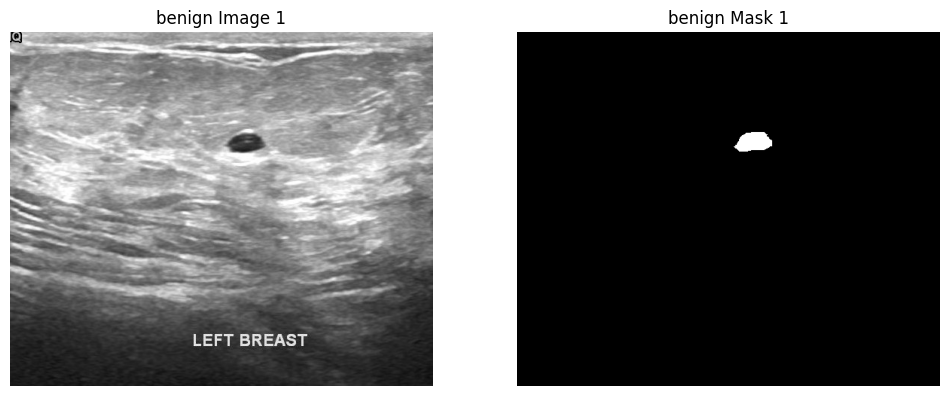

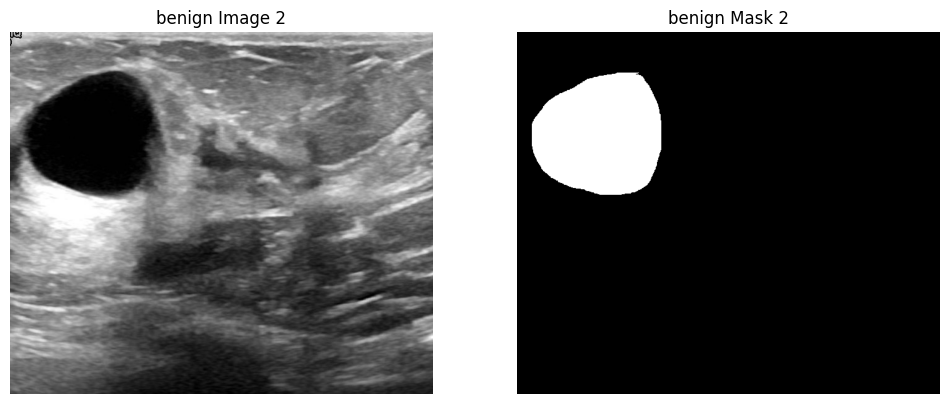

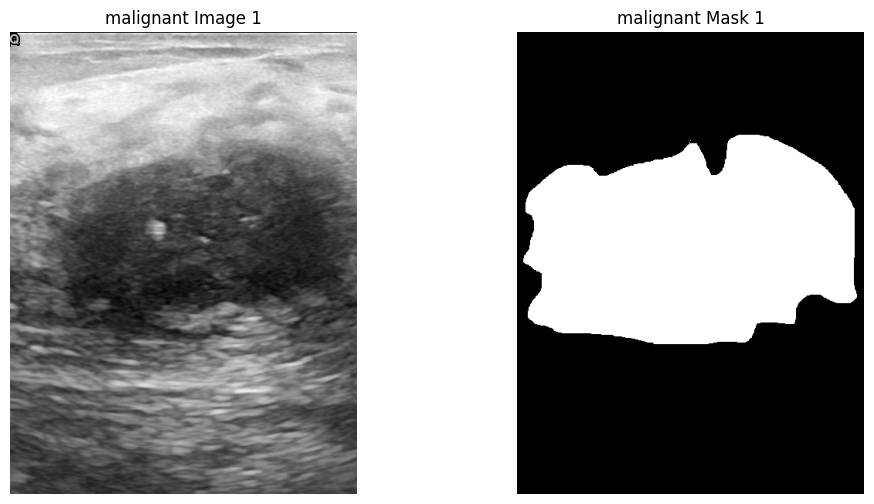

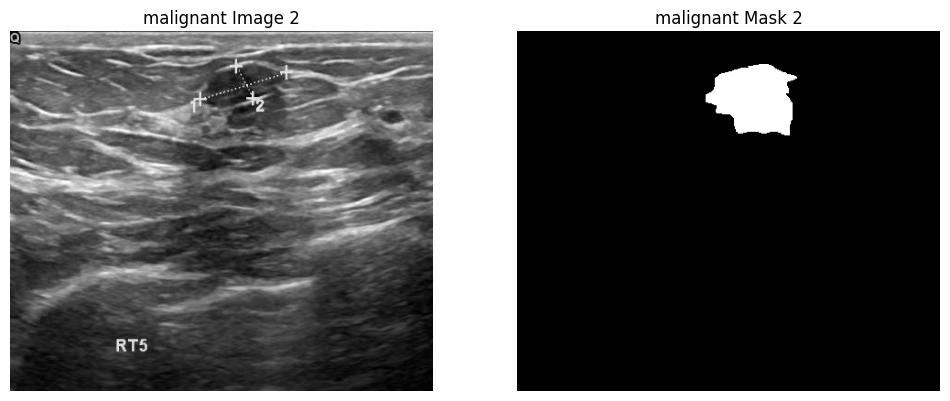

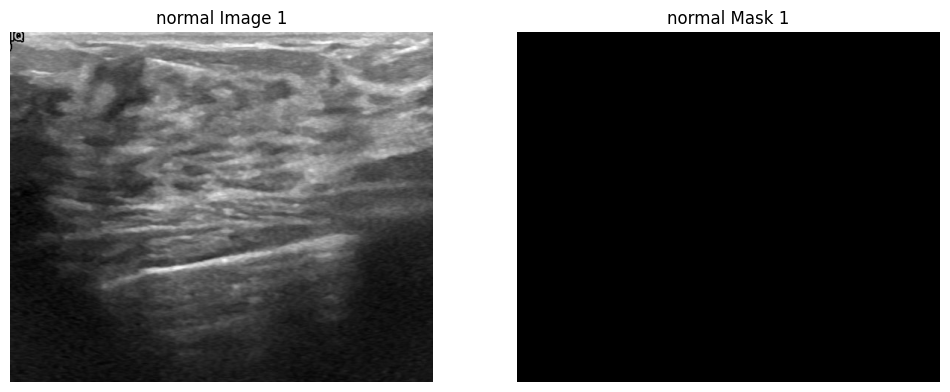

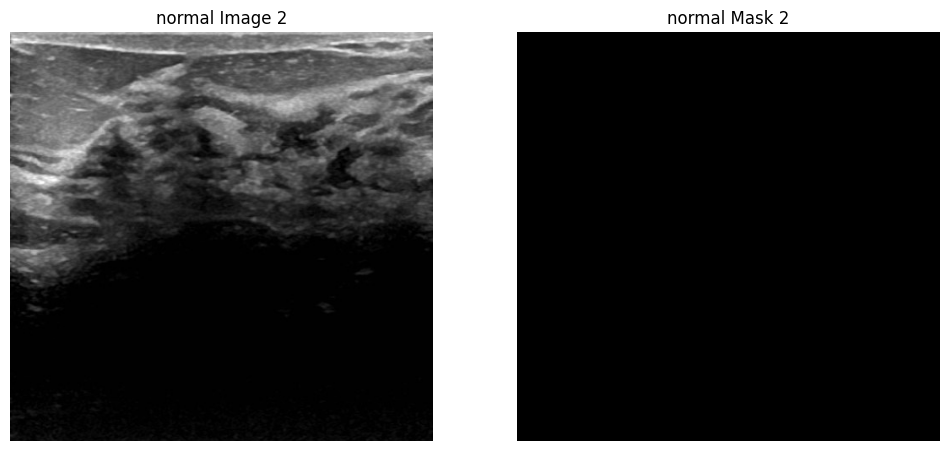

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the base directory path
base_dir = 'Dataset_BUSI_with_GT'

# Define a function to visualize images and masks
def visualize_images(base_dir, categories):
    for category in categories:
        # Get all image and mask file paths
        image_files = sorted([f for f in os.listdir(os.path.join(base_dir, category)) if f.endswith('.png') and not f.endswith('_mask.png')])
        mask_files = sorted([f for f in os.listdir(os.path.join(base_dir, category)) if f.endswith('_mask.png')])

        # Display first 2 images and masks
        for i in range(2):
            image_path = os.path.join(base_dir, category, image_files[i])
            mask_path = os.path.join(base_dir, category, mask_files[i])

            # Load images
            image = Image.open(image_path)
            mask = Image.open(mask_path)

            # Plot images
            plt.figure(figsize=(12, 6))

            # Plot original image
            plt.subplot(1, 2, 1)
            plt.imshow(image, cmap='gray')
            plt.title(f'{category} Image {i+1}')
            plt.axis('off')

            # Plot mask
            plt.subplot(1, 2, 2)
            plt.imshow(mask, cmap='gray')
            plt.title(f'{category} Mask {i+1}')
            plt.axis('off')

            plt.show()

# Define the categories
categories = ['benign', 'malignant', 'normal']

# Visualize images and masks
visualize_images(base_dir, categories)


## 4. **[Instance Segmentation Using YOLOv8](https://docs.ultralytics.com/tasks/segment/)**

### Instance Segmentation

Instance segmentation is a computer vision task that involves identifying and separating individual objects within an image. This task encompasses detecting the boundaries of each object and assigning a unique label to each detected instance. It combines the objectives of both semantic segmentation and object detection, with the added capability of distinguishing between different instances of the same class.

#### Key Characteristics:

- **Detection and Differentiation**: Instance segmentation detects all instances of a class and demarcates separate instances of any segment class.
- **Pixel-wise Segmentation**: Produces a pixel-wise segmentation map of the image, where each pixel is assigned to a specific object instance.
- **Boundary Detection**: Involves identifying and separating individual objects within an image, detecting the boundaries of each object, and assigning a unique label to each object.

#### Example:

Instance segmentation can distinguish between different instances of the same category, such as different chairs in a room, whereas semantic segmentation would only label all chairs as a single category.

#### Datasets:

1. **[LiDAR Bonnetal Dataset](https://paperswithcode.com/dataset/bonnetal)**
2. **[HRSID (High-Resolution SAR Images Dataset)](https://paperswithcode.com/dataset/hrsid)**
3. **[SSDD (SAR Ship Detection Dataset)](https://paperswithcode.com/dataset/ssdd)**
4. **[Pascal SBD Dataset](https://paperswithcode.com/dataset/pascal-sbd)**
5. **[iSAID (A Large Scale Aerial Images Dataset)](https://paperswithcode.com/dataset/isaid)**

#### Best Models:

1. **EVA** (COCO test-dev)
2. **InternImage-H** (COCO minival)
3. **Co-DETR** (LVIS v1.0 val)
4. **OneFormer** (Cityscapes val and ADE20K val)

#### Papers and Resources:

1. **[Papers with Code - Instance Segmentation](https://paperswithcode.com/task/instance-segmentation)**: A comprehensive resource listing instance segmentation models, datasets, and papers.
2. **[What is Instance Segmentation?](https://www.cvlibs.net/publications/)**: A detailed explanation of instance segmentation.
3. **[Semantic Segmentation vs. Instance Segmentation: Explained](https://medium.com/@deepblocks/semantic-segmentation-vs-instance-segmentation-explained-36cf0f123854)**: An article explaining the differences between semantic and instance segmentation.
4. **[What Is Instance Segmentation? 2024 Guide & Tutorial](https://viso.ai/computer-vision/instance-segmentation/)**: A comprehensive guide and tutorial on instance segmentation.

Instance segmentation is crucial for advanced computer vision applications where the distinction between individual objects is necessary, such as in autonomous driving, medical imaging, and robotics.




## Data annotation for YOLOv8

From here I must obtain from all the images that carry `*_mask*.png` a file of annotations `.txt` in format YOLO. the class_index is given by the subdirectory that hangs from `Dataset_BUSI_with_GT`:

```
Dataset_BUSI_with_GT
├── benign
    |- benign (1).png
    |- begnign (1)_mask.png
    |- etc
├── malignant
└── normal
```

### Ultralytics YOLO format:

The dataset label format used for training YOLO segmentation models is as follows:


- One text file per image: Each image in the dataset has a corresponding text file with the same name as the image file and the ".txt" extension.
- One row per object: Each row in the text file corresponds to one object instance in the image.
- Object information per row: Each row contains the following information about the object instance:
- Object class index: An integer representing the class of the object (e.g., 0 for person, 1 for car, etc.).
- Object bounding coordinates: The bounding coordinates around the mask area, normalized to be between 0 and 1.


The format for a single row in the segmentation dataset file is as follows:

```<class-index> <x1> <y1> <x2> <y2> ... <xn> <yn>```


In this format, `<class-index>` is the index of the class for the object, and `<x1> <y1> <x2> <y2> ... <xn> <yn>` are the bounding coordinates of the object's segmentation mask. The coordinates are separated by spaces.

Here is an example of the YOLO dataset format for a single image with two objects made up of a 3-point segment and a 5-point segment.

```
0 0.681 0.485 0.670 0.487 0.676 0.487
1 0.504 0.000 0.501 0.004 0.498 0.004 0.493 0.010 0.492 0.0104
```

---
**import libraries**

---

In [ ]:
import os
import cv2
import numpy as np

---
**Define normalize_coordinates Function**

---

In [ ]:
def normalize_coordinates(coords, width, height):
    """Normalize coordinates to YOLO format (0 to 1)."""
    return [(x / width, y / height) for x, y in coords]

This function normalizes coordinates to YOLO format (0 to 1) based on the width and height of the image.

---
**Define get_object_boundaries Function**

---

In [ ]:
def get_object_boundaries(mask_path):
    """Extract object boundaries from mask image."""
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boundaries = [contour.squeeze(1).tolist() for contour in contours if len(contour) >= 3]  # Keep only contours with at least 3 points
    return boundaries, mask.shape[1], mask.shape[0]


This function extracts object boundaries from a mask image using OpenCV.

---
**Define save_annotations Function**

---

In [ ]:
def save_annotations(image_name, annotations, output_dir):
    """Save annotations in YOLO format to a text file."""
    txt_path = os.path.join(output_dir, image_name.replace('.png', '.txt'))
    with open(txt_path, 'w') as file:
        for annotation in annotations:
            class_idx, boundary = annotation
            boundary_str = ' '.join([f'{x} {y}' for x, y in boundary])
            file.write(f'{class_idx} {boundary_str}\n')


This function saves the annotations in YOLO format to a text file.



---
**Define process_dataset Function**

---

In [ ]:
def process_dataset(image_dir, label_dir, output_dir, class_idx):
    """Process the dataset and generate YOLO annotation files."""
    if not os.path.isdir(label_dir):
        raise NotADirectoryError(f'{label_dir} is not a directory.')

    os.makedirs(output_dir, exist_ok=True)

    # Dictionary to hold all annotations for each image
    image_annotations = {}

    for mask_file in os.listdir(label_dir):
        mask_path = os.path.join(label_dir, mask_file)
        if not os.path.isfile(mask_path):
            continue

        if '_mask' in mask_file and mask_file.endswith('.png'):
            boundaries, width, height = get_object_boundaries(mask_path)
            annotations = [(class_idx, normalize_coordinates(boundary, width, height)) for boundary in boundaries]
            image_name = mask_file.split('_mask')[0] + '.png'

            if image_name not in image_annotations:
                image_annotations[image_name] = []

            image_annotations[image_name].extend(annotations)

    # Save all collected annotations
    for image_name, annotations in image_annotations.items():
        save_annotations(image_name, annotations, output_dir)

This function processes the dataset and generates YOLO annotation files.

---
**Define Paths and Class Indices**

---

In [ ]:
# Define paths
base_dir = 'Dataset_BUSI_with_GT'
output_base_dir = base_dir

# Define class indices
class_indices = {'benign': 0, 'malignant': 1, 'normal': 2}


In this cell, we define the base directory for the dataset and the class indices.



---
**Process Each Class in the Dataset**

---

In [ ]:
# Process each class
for class_name, class_idx in class_indices.items():
    # Paths for images and labels
    image_dir = os.path.join(base_dir, class_name)
    label_dir = os.path.join(base_dir, class_name)
    output_dir = os.path.join(output_base_dir, class_name)

    process_dataset(image_dir, label_dir, output_dir, class_idx)

print("Annotations created successfully")


Annotations created successfully


This cell processes each class in the dataset by calling the process_dataset function.



---
**List type of files in subdirectories**

---

In [ ]:
!tree --dirsfirst -L 2  "Dataset_BUSI_with_GT"| head -n 10

Dataset_BUSI_with_GT
├── benign
│   ├── benign (100)_mask_1.png
│   ├── benign (100)_mask.png
│   ├── benign (100).png
│   ├── benign (100).txt
│   ├── benign (101)_mask.png
│   ├── benign (101).png
│   ├── benign (101).txt
│   ├── benign (102)_mask.png


In the case where there are no annotations for an image, it is correct that the .txt annotation file is empty, since there are no objects to annotate. However, if you want every .txt file to have at least the class of the image, even when there are no objects detected, you can modify the script to include an entry in the text file for the class, albeit without coordinates.



## 5. **Data Preparation**

We want split our data in train, val y test data.

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths
original_dataset_dir = 'Dataset_BUSI_with_GT'
base_dir = 'BreastUltraSoundImages'

# Define new paths for train, val, and test
image_dir = os.path.join(base_dir, 'images')
label_dir = os.path.join(base_dir, 'labels')
train_image_dir = os.path.join(image_dir, 'train')
val_image_dir = os.path.join(image_dir, 'val')
test_image_dir = os.path.join(image_dir, 'test')
train_label_dir = os.path.join(label_dir, 'train')
val_label_dir = os.path.join(label_dir, 'val')
test_label_dir = os.path.join(label_dir, 'test')

# Create directories if they do not exist
os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(val_image_dir, exist_ok=True)
os.makedirs(test_image_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)
os.makedirs(test_label_dir, exist_ok=True)

# List the classes
classes = ['benign', 'malignant', 'normal']

# Function to copy images and corresponding labels
def copy_images_and_labels(class_name, src_image_dir, src_label_dir, train_image_dst, val_image_dst, test_image_dst,
                           train_label_dst, val_label_dst, test_label_dst, train_ratio=0.7, val_ratio=0.15):
    # List all images in the class
    images = os.listdir(src_image_dir)
    images = [img for img in images if img.endswith('.png')]  # Adjust the extension if needed
    image_paths = [os.path.join(src_image_dir, img) for img in images]
    label_paths = [os.path.join(src_label_dir, img.replace('.png', '.txt')) for img in images]  # Adjust the mask naming convention

    # Split into train, val, and test
    train_images, temp_images, train_labels, temp_labels = train_test_split(
        image_paths, label_paths, train_size=train_ratio, random_state=42)
    val_images, test_images, val_labels, test_labels = train_test_split(
        temp_images, temp_labels, test_size=val_ratio / (val_ratio + (1 - train_ratio)), random_state=42)

    # Copy images and labels
    for img, label in zip(train_images, train_labels):
        if os.path.exists(label):  # Ensure the label file exists before copying
            shutil.copy(img, train_image_dst)
            shutil.copy(label, train_label_dst)

    for img, label in zip(val_images, val_labels):
        if os.path.exists(label):  # Ensure the label file exists before copying
            shutil.copy(img, val_image_dst)
            shutil.copy(label, val_label_dst)

    for img, label in zip(test_images, test_labels):
        if os.path.exists(label):  # Ensure the label file exists before copying
            shutil.copy(img, test_image_dst)
            shutil.copy(label, test_label_dst)

# Copy images and labels for each class
for class_name in classes:
    src_image_dir = os.path.join(original_dataset_dir,class_name)
    src_label_dir = os.path.join(original_dataset_dir, class_name)  # Adjust if masks are in a different directory
    copy_images_and_labels(class_name, src_image_dir, src_label_dir, train_image_dir, val_image_dir, test_image_dir,
                           train_label_dir, val_label_dir, test_label_dir)

print("Dataset reorganized successfully")


Dataset reorganized successfully


In [ ]:
!tree --dirsfirst -L 4 --filelimit 10 "BreastUltraSoundImages"

BreastUltraSoundImages
├── images
│   ├── test  [83 entries exceeds filelimit, not opening dir]
│   ├── train  [541 entries exceeds filelimit, not opening dir]
│   └── val  [156 entries exceeds filelimit, not opening dir]
└── labels
    ├── test  [83 entries exceeds filelimit, not opening dir]
    ├── train  [541 entries exceeds filelimit, not opening dir]
    └── val  [156 entries exceeds filelimit, not opening dir]

8 directories, 0 files


---
**Visualiza 4 imagenes y sus mascaras correspondientes para test, train y val.**

---

In [ ]:
!pip install -q opencv-python matplotlib

Train samples 



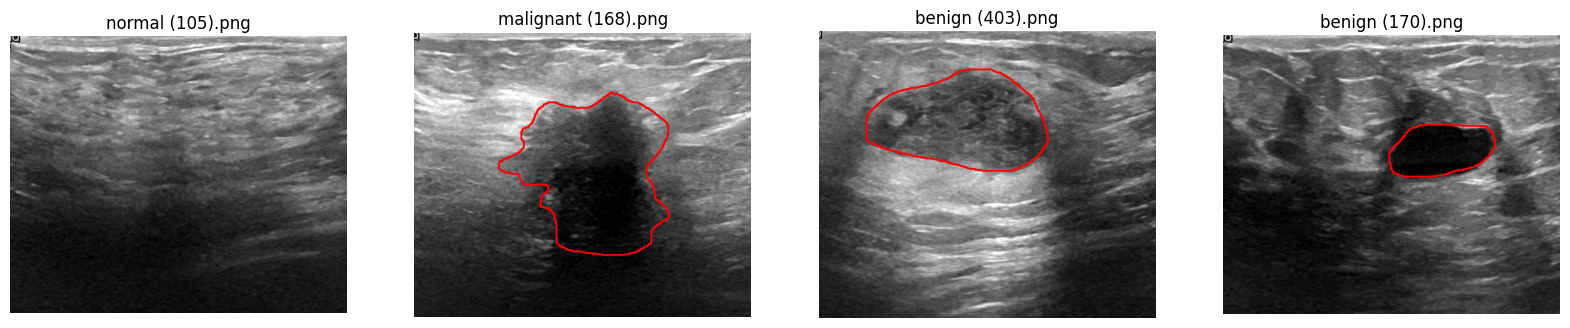


 Test samples 



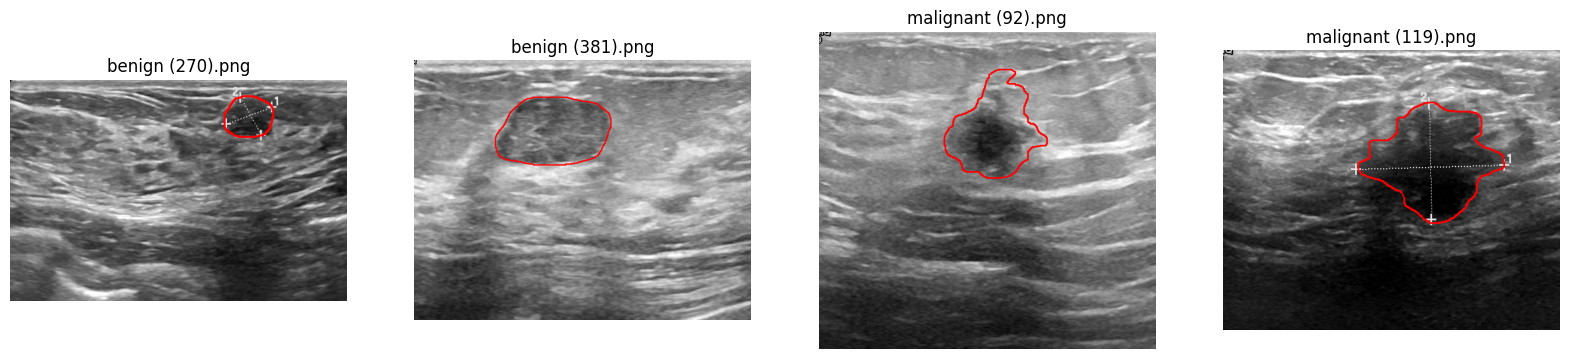


 Validation samples 



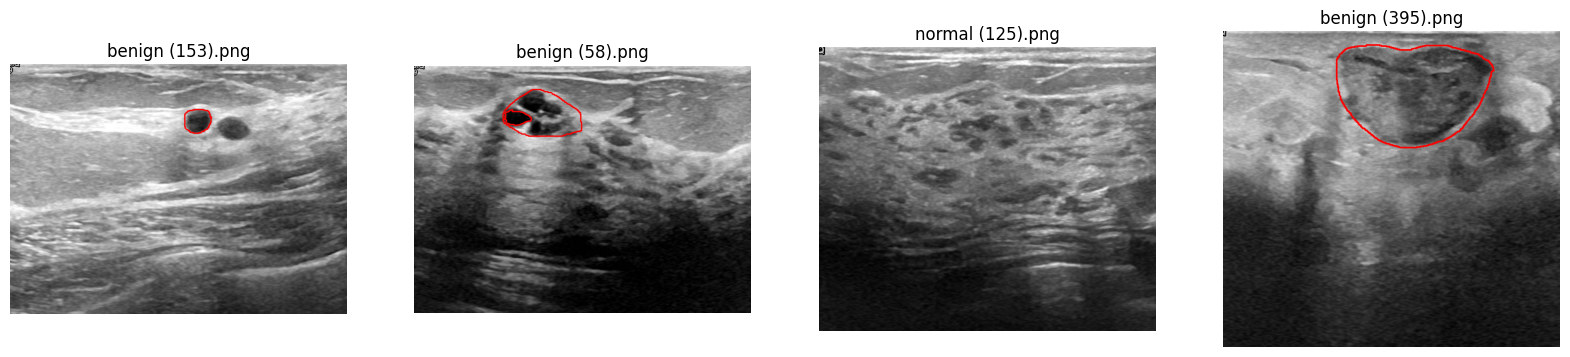

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np # Import numpy

def load_annotations(label_path):
    """Load annotations from a YOLO format text file."""
    annotations = []
    with open(label_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) < 3:
                continue  # Skip lines that do not have at least class_id and one pair of coordinates
            class_id = int(parts[0])
            coords = [float(coord) for coord in parts[1:]]
            if len(coords) % 2 != 0:
                continue  # Skip lines with an odd number of coordinates
            annotations.append((class_id, coords))
    return annotations

def draw_annotations(image, annotations):
    """Draw annotations on an image."""
    height, width, _ = image.shape
    for annotation in annotations:
        class_id, coords = annotation
        points = [(int(coords[i] * width), int(coords[i + 1] * height)) for i in range(0, len(coords), 2)]
        points = np.array(points, np.int32)
        # Reshape to a 2D array with at least 2 columns
        points = points.reshape((-1, 2))  # Change from (-1, 1) to (-1, 2)
        cv2.polylines(image, [points], isClosed=True, color=(255, 0, 0), thickness=2)
    return image

def visualize_samples(images_dir, labels_dir, sample_size=4):
    """Visualize sample images with annotations in a grid."""
    image_files = os.listdir(images_dir)[:sample_size]

    # Handle the case when sample_size is 1
    if sample_size == 1:
        fig, ax = plt.subplots(figsize=(5, 5))  # Create a single Axes object
        axes = [ax]  # Wrap it in a list for consistency
    else:
        fig, axes = plt.subplots(1, sample_size, figsize=(20, 5))

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(images_dir, image_file)
        label_path = os.path.join(labels_dir, image_file.replace('.png', '.txt'))

        # Load and process the image within the loop
        image = cv2.imread(image_path) # Moved image loading inside the loop
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if os.path.exists(label_path):
            annotations = load_annotations(label_path)
            image = draw_annotations(image, annotations)

        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_file)

    plt.show()

# Define paths
base_dir = 'BreastUltraSoundImages'

# Visualize samples for train, test, and val sets
print("Train samples \n")
visualize_samples(os.path.join(base_dir, 'images/train'), os.path.join(base_dir, 'labels/train'))

print("\n Test samples \n")
visualize_samples(os.path.join(base_dir, 'images/test'), os.path.join(base_dir, 'labels/test'))

print("\n Validation samples \n")
visualize_samples(os.path.join(base_dir, 'images/val'), os.path.join(base_dir, 'labels/val'))

---
**Display an example with more than one annotation**

---

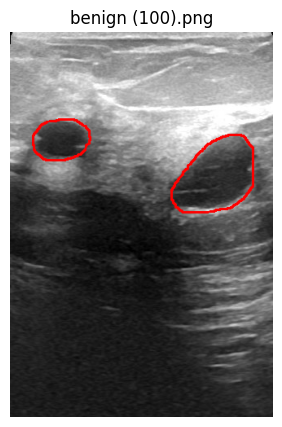

In [ ]:
# Define paths
base_dir = 'BreastUltraSoundImages'
image_name = 'benign (100).png'

# Display the specific image
image_path = os.path.join(base_dir, 'images/train', image_name)
label_path = os.path.join(base_dir, 'labels/train', image_name.replace('.png', '.txt'))
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
if os.path.exists(label_path):
    annotations = load_annotations(label_path)
    image = draw_annotations(image, annotations)
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('off')
plt.title(image_name)
plt.show()

## 6. **Train the model for Segmenting Breast Ultrasound images**

---
**Install ultralytics**

---

In [ ]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.5/825.5 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 69.0 MB/s eta 0:00:00


---
**Create yaml archive**

---

In [ ]:
#create yaml archive

import yaml

# Content of the YAML file
data = {
    'path': '../BreastUltraSoundImages', # Path to the dataset directory
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'nc': 3,  # Number of classes (benign, malignant, normal)
    'names': {
        0: 'benign',
        1: 'malignant',
        2: 'normal'
    },
}

# Create and write to data.yaml
with open('data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False, allow_unicode=True)

print("Archivo data.yaml creado exitosamente.")

Archivo data.yaml creado exitosamente.


### Augmentation Settings and Hyperparameters

Augmentation techniques are essential for improving the robustness and performance of YOLO models by introducing variability into the training data, helping the model generalize better to unseen data. The following table outlines the purpose and effect of each augmentation argument:

| Argument      | Type  | Default | Range      | Description |
|---------------|-------|---------|------------|-------------|
| hsv_h         | float | 0.015   | 0.0 - 1.0  | Adjusts the hue of the image by a fraction of the color wheel, introducing color variability. Helps the model generalize across different lighting conditions. |
| hsv_s         | float | 0.7     | 0.0 - 1.0  | Alters the saturation of the image by a fraction, affecting the intensity of colors. Useful for simulating different environmental conditions. |
| hsv_v         | float | 0.4     | 0.0 - 1.0  | Modifies the value (brightness) of the image by a fraction, helping the model to perform well under various lighting conditions. |
| degrees       | float | 0.0     | -180 - +180| Rotates the image randomly within the specified degree range, improving the model's ability to recognize objects at various orientations. |
| translate     | float | 0.1     | 0.0 - 1.0  | Translates the image horizontally and vertically by a fraction of the image size, aiding in learning to detect partially visible objects. |
| scale         | float | 0.5     | >=0.0      | Scales the image by a gain factor, simulating objects at different distances from the camera. |
| shear         | float | 0.0     | -180 - +180| Shears the image by a specified degree, mimicking the effect of objects being viewed from different angles. |
| perspective   | float | 0.0     | 0.0 - 0.001| Applies a random perspective transformation to the image, enhancing the model's ability to understand objects in 3D space. |
| flipud        | float | 0.0     | 0.0 - 1.0  | Flips the image upside down with the specified probability, increasing the data variability without affecting the object's characteristics. |
| fliplr        | float | 0.5     | 0.0 - 1.0  | Flips the image left to right with the specified probability, useful for learning symmetrical objects and increasing dataset diversity. |
| bgr           | float | 0.0     | 0.0 - 1.0  | Flips the image channels from RGB to BGR with the specified probability, useful for increasing robustness to incorrect channel ordering. |
| mosaic        | float | 1.0     | 0.0 - 1.0  | Combines four training images into one, simulating different scene compositions and object interactions. Highly effective for complex scene understanding. |
| mixup         | float | 0.0     | 0.0 - 1.0  | Blends two images and their labels, creating a composite image. Enhances the model's ability to generalize by introducing label noise and visual variability. |
| copy_paste    | float | 0.0     | 0.0 - 1.0  | Copies objects from one image and pastes them onto another, useful for increasing object instances and learning object occlusion. |
| auto_augment  | str   | randaugment | -        | Automatically applies a predefined augmentation policy (randaugment, autoaugment, augmix), optimizing for classification tasks by diversifying the visual features. |
| erasing       | float | 0.4     | 0.0 - 0.9  | Randomly erases a portion of the image during classification training, encouraging the model to focus on less obvious features for recognition. |
| crop_fraction | float | 1.0     | 0.1 - 1.0  | Crops the classification image to a fraction of its size to emphasize central features and adapt to object scales, reducing background distractions. |

These settings can be adjusted to meet the specific requirements of the dataset and task at hand. Experimenting with different values can help find the optimal augmentation strategy that leads to the best model performance.


---
**Training**

---

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model for segmentation
model = YOLO('yolov8n-seg.pt')


# Training the model
model.train(data='data.yaml', epochs=100, imgsz=640)


Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

train: Scanning /content/BreastUltraSoundImages/labels/train.cache... 541 images, 92 backgrounds, 0 corrupt: 100%|██████████| 541/541 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/BreastUltraSoundImages/labels/val.cache... 156 images, 28 backgrounds, 0 corrupt: 100%|██████████| 156/156 [00:00<?, ?it/s]


Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.15G    0.01444    0.02706      3.355      2.161         36        640: 100%|██████████| 34/34 [00:25<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]

                   all        156        135    0.00031     0.0958   0.000173   2.94e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100       4.5G    0.01462    0.02287      2.865      2.317         35        640: 100%|██████████| 34/34 [00:20<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        156        135     0.0273      0.107    0.00222   0.000369    0.00181      0.104     0.0012   0.000186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100       4.4G    0.01429    0.02254      2.798      2.336         35        640: 100%|██████████| 34/34 [00:20<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all        156        135     0.0273      0.107    0.00222   0.000369    0.00181      0.104     0.0012   0.000186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.38G     0.0137    0.02229      2.758      2.307         38        640: 100%|██████████| 34/34 [00:21<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        156        135      0.051      0.026      0.013    0.00325     0.0408     0.0208     0.0104    0.00285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.35G    0.01329    0.02125      2.575      2.262         46        640: 100%|██████████| 34/34 [00:21<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        156        135      0.602     0.0469      0.046     0.0177      0.614     0.0521     0.0471     0.0143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.44G    0.01288    0.02164      2.563        2.2         33        640: 100%|██████████| 34/34 [00:21<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        156        135      0.773      0.156      0.169      0.076      0.773      0.156      0.169     0.0762



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.42G    0.01252    0.02119      2.488      2.128         42        640: 100%|██████████| 34/34 [00:21<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        156        135     0.0955      0.109     0.0885     0.0377     0.0955      0.109     0.0864     0.0353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100       4.4G    0.01248    0.02165      2.498      2.195         43        640: 100%|██████████| 34/34 [00:21<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        156        135      0.363      0.362      0.345      0.182      0.363      0.362      0.343      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100       4.4G    0.01267    0.02138      2.545      2.211         33        640: 100%|██████████| 34/34 [00:20<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all        156        135      0.251      0.286      0.268      0.146      0.246      0.276      0.271      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.42G    0.01209    0.01973      2.349      2.074         29        640: 100%|██████████| 34/34 [00:21<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        156        135      0.827      0.286      0.307      0.178      0.827      0.286      0.309      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.34G    0.01197    0.02088      2.292      2.051         31        640: 100%|██████████| 34/34 [00:18<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.12s/it]

                   all        156        135      0.335       0.45      0.356      0.187      0.342      0.357      0.347      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.43G    0.01206    0.02111      2.347      2.058         34        640: 100%|██████████| 34/34 [00:25<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]

                   all        156        135      0.328      0.361      0.323      0.178      0.328      0.356      0.316      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.44G    0.01145    0.02027       2.25      1.999         37        640: 100%|██████████| 34/34 [00:20<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        156        135      0.332      0.425      0.361      0.216      0.332      0.425       0.35      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.44G    0.01129    0.02002      2.237      1.971         38        640: 100%|██████████| 34/34 [00:19<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        156        135      0.751      0.234      0.331      0.172      0.751      0.234      0.317      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.46G    0.01144    0.02031      2.251      2.003         39        640: 100%|██████████| 34/34 [00:20<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        156        135      0.451      0.482      0.442      0.259      0.457      0.482      0.419      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100       4.4G     0.0112    0.01999      2.222      1.957         29        640: 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all        156        135      0.405      0.339      0.407      0.221      0.405      0.339      0.406      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.35G    0.01132    0.01963       2.18      1.956         43        640: 100%|██████████| 34/34 [00:19<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]

                   all        156        135      0.619      0.425      0.445       0.24      0.581      0.421      0.458      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       4.4G    0.01115    0.01985       2.17      1.985         35        640: 100%|██████████| 34/34 [00:19<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        156        135      0.407      0.403      0.391      0.217      0.373      0.385      0.374      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.46G    0.01098     0.0207      2.213      1.972         34        640: 100%|██████████| 34/34 [00:19<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        156        135      0.405      0.386      0.399       0.23      0.405      0.386      0.394      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.34G    0.01099    0.01994      2.123      1.954         38        640: 100%|██████████| 34/34 [00:19<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        156        135       0.35       0.53      0.458      0.282      0.351      0.531       0.46      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.34G    0.01123    0.02025      2.203      1.989         37        640: 100%|██████████| 34/34 [00:21<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        156        135      0.453      0.481      0.433      0.267      0.436      0.447      0.428       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100       4.4G    0.01142    0.02084      2.207      1.972         43        640: 100%|██████████| 34/34 [00:20<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        156        135      0.327      0.408      0.372      0.234      0.383      0.416      0.375      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.35G    0.01067    0.01997      2.103      1.886         37        640: 100%|██████████| 34/34 [00:21<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        156        135      0.496      0.509       0.49      0.304      0.523      0.527      0.496       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.44G    0.01043    0.01952      1.978      1.868         36        640: 100%|██████████| 34/34 [00:20<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        156        135      0.504      0.534      0.478      0.285      0.531      0.515      0.481      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.33G    0.01054    0.01905      2.024      1.853         42        640: 100%|██████████| 34/34 [00:19<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        156        135      0.454      0.502      0.467      0.282      0.449      0.493       0.45      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.44G    0.01058     0.0194      2.048      1.883         46        640: 100%|██████████| 34/34 [00:19<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        156        135      0.422      0.493      0.445      0.274      0.409       0.48      0.424      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.42G    0.01075     0.0197      2.112      1.887         37        640: 100%|██████████| 34/34 [00:18<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

                   all        156        135      0.424      0.467       0.43      0.257      0.428      0.437      0.419      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100       4.3G     0.0106    0.01963      2.061      1.868         27        640: 100%|██████████| 34/34 [00:19<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]

                   all        156        135      0.517      0.452      0.482      0.306      0.506      0.448      0.487      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.46G    0.01069      0.019      2.061      1.872         42        640: 100%|██████████| 34/34 [00:18<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.13s/it]

                   all        156        135      0.497      0.577      0.555      0.316      0.392      0.512      0.481      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.46G    0.01039    0.01937      2.008      1.865         32        640: 100%|██████████| 34/34 [00:19<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        156        135      0.519      0.544      0.502      0.308      0.513      0.526      0.486      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.37G    0.01056    0.01938      2.026      1.884         38        640: 100%|██████████| 34/34 [00:20<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        156        135      0.442      0.576      0.543      0.338      0.474      0.589      0.531      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.45G    0.01052    0.02012      2.021      1.896         29        640: 100%|██████████| 34/34 [00:21<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all        156        135       0.56      0.557       0.51      0.283      0.557      0.557      0.488      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.43G    0.01025    0.01896      1.961      1.835         51        640: 100%|██████████| 34/34 [00:19<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        156        135      0.501      0.507      0.498      0.282      0.537       0.53      0.512      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.41G   0.009939    0.01851      1.922      1.801         41        640: 100%|██████████| 34/34 [00:20<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        156        135      0.407       0.51       0.47       0.29      0.871      0.391       0.44       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.38G    0.01013    0.01933      1.938      1.801         40        640: 100%|██████████| 34/34 [00:20<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        156        135      0.564      0.555      0.548      0.333      0.582      0.568      0.557      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.44G    0.01055    0.02005      2.055       1.88         35        640: 100%|██████████| 34/34 [00:20<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

                   all        156        135      0.445      0.668      0.537      0.303      0.587       0.47      0.473      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100       4.3G    0.01038    0.01962       2.01      1.868         28        640: 100%|██████████| 34/34 [00:18<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]

                   all        156        135      0.516      0.583      0.559      0.336       0.54      0.596      0.558      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.42G    0.01038    0.01918       2.02      1.841         27        640: 100%|██████████| 34/34 [00:19<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        156        135       0.44      0.559      0.533      0.304      0.412      0.576      0.513      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.45G   0.009926    0.01947      1.951      1.825         30        640: 100%|██████████| 34/34 [00:21<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        156        135      0.484      0.503      0.491      0.288      0.463      0.515      0.452      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.33G    0.01039    0.01921      1.971      1.845         33        640: 100%|██████████| 34/34 [00:20<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        156        135      0.682      0.542      0.603      0.372      0.679      0.537      0.582      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100       4.4G    0.01004    0.01912      1.963      1.803         24        640: 100%|██████████| 34/34 [00:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        156        135      0.503      0.532      0.505      0.311      0.503      0.532      0.493      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.42G   0.009803    0.01861       1.88      1.789         25        640: 100%|██████████| 34/34 [00:20<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        156        135      0.641      0.598        0.6      0.374      0.636      0.593      0.588      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100       4.4G   0.009987    0.01945       1.99      1.822         31        640: 100%|██████████| 34/34 [00:20<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        156        135      0.593      0.596      0.553      0.341      0.596       0.59      0.539      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.44G   0.009595    0.01817      1.836      1.743         35        640: 100%|██████████| 34/34 [00:21<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

                   all        156        135      0.476      0.519      0.489      0.318      0.476      0.519      0.486      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.39G   0.009986    0.01881      1.854      1.805         27        640: 100%|██████████| 34/34 [00:18<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.12s/it]

                   all        156        135      0.505      0.586      0.566      0.338       0.52      0.542       0.53      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.44G    0.01028    0.01927       1.91      1.842         26        640: 100%|██████████| 34/34 [00:19<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        156        135       0.45      0.624      0.571      0.318      0.446      0.616      0.547      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.42G    0.01042    0.01942      1.998      1.858         33        640: 100%|██████████| 34/34 [00:21<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        156        135      0.505      0.542      0.493      0.285      0.552      0.537      0.493       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.41G   0.009932    0.01887      1.887      1.797         32        640: 100%|██████████| 34/34 [00:21<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all        156        135       0.51      0.558      0.566      0.353      0.534      0.609      0.593      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.46G   0.009725    0.01839      1.805      1.757         34        640: 100%|██████████| 34/34 [00:20<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.67it/s]

                   all        156        135      0.615      0.539      0.571      0.342      0.521      0.483      0.493      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.49G    0.01001    0.01876      1.883      1.812         36        640: 100%|██████████| 34/34 [00:20<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        156        135      0.571      0.496      0.521      0.331      0.695      0.472      0.524      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.46G    0.01018     0.0194      1.939      1.835         35        640: 100%|██████████| 34/34 [00:20<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        156        135       0.66      0.562      0.596       0.37      0.712      0.575      0.597      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.46G    0.01005    0.01834      1.828      1.794         35        640: 100%|██████████| 34/34 [00:21<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.14s/it]

                   all        156        135       0.63       0.61       0.63      0.381      0.594      0.591      0.591      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.43G   0.009592    0.01812      1.853      1.741         20        640: 100%|██████████| 34/34 [00:20<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        156        135        0.6      0.528      0.505      0.311      0.584       0.51      0.491      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.44G   0.009638    0.01881      1.837      1.753         40        640: 100%|██████████| 34/34 [00:21<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        156        135      0.612      0.574      0.565      0.362      0.622      0.583      0.558       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.42G   0.009487    0.01853      1.835      1.752         50        640: 100%|██████████| 34/34 [00:22<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        156        135      0.531      0.642      0.628      0.402      0.542      0.629      0.631       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.43G   0.009516    0.01843       1.81      1.746         40        640: 100%|██████████| 34/34 [00:23<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        156        135      0.494      0.558       0.55      0.352      0.528      0.571      0.539       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.43G    0.00972    0.01974      1.877      1.782         34        640: 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        156        135      0.468      0.519      0.495      0.308      0.468      0.519      0.477      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.33G   0.009403    0.01834      1.837      1.723         25        640: 100%|██████████| 34/34 [00:22<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        156        135      0.587      0.671      0.653        0.4      0.606      0.671      0.633      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.42G   0.009447    0.01775      1.726      1.722         41        640: 100%|██████████| 34/34 [00:20<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        156        135      0.676      0.568      0.625      0.379      0.674      0.568       0.61      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.32G       0.01    0.01901      1.862      1.808         41        640: 100%|██████████| 34/34 [00:19<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        156        135       0.64      0.477      0.533      0.339      0.656      0.498      0.532      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.42G   0.009536     0.0187      1.757      1.755         37        640: 100%|██████████| 34/34 [00:20<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.05s/it]

                   all        156        135      0.653      0.501      0.545      0.351      0.649      0.495      0.533      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.42G   0.009684    0.01893      1.845      1.745         40        640: 100%|██████████| 34/34 [00:19<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.13s/it]

                   all        156        135      0.452      0.601      0.606      0.389      0.687      0.537      0.623      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.44G   0.009629    0.01804      1.767      1.733         43        640: 100%|██████████| 34/34 [00:20<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        156        135      0.679      0.604      0.653      0.393      0.665      0.591      0.629      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.37G   0.009229     0.0184      1.736      1.706         35        640: 100%|██████████| 34/34 [00:21<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        156        135      0.609      0.671      0.663      0.411      0.656      0.624      0.645      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.42G   0.009349    0.01845      1.766      1.713         38        640: 100%|██████████| 34/34 [00:22<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        156        135      0.539      0.604      0.613      0.409      0.687      0.611      0.639      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.43G   0.009369    0.01819      1.764      1.732         34        640: 100%|██████████| 34/34 [00:21<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        156        135      0.599      0.565      0.611      0.406      0.645      0.578      0.621      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.42G   0.009166    0.01812      1.697      1.695         30        640: 100%|██████████| 34/34 [00:22<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        156        135      0.528      0.655      0.603      0.386      0.508       0.63      0.574      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.42G   0.009237    0.01763      1.725      1.708         36        640: 100%|██████████| 34/34 [00:21<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        156        135      0.651      0.656      0.617      0.392      0.661      0.619      0.601      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.43G   0.008895    0.01758       1.65      1.652         29        640: 100%|██████████| 34/34 [00:20<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        156        135      0.502      0.707      0.635      0.405      0.535      0.694      0.618       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.41G   0.009353      0.018      1.647      1.695         40        640: 100%|██████████| 34/34 [00:20<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]

                   all        156        135      0.684      0.632      0.655      0.412        0.7      0.645      0.652      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.42G   0.009135     0.0179      1.671      1.679         40        640: 100%|██████████| 34/34 [00:19<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

                   all        156        135      0.605      0.635      0.637       0.41      0.635      0.581      0.594      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.46G   0.009228    0.01828      1.708       1.69         53        640: 100%|██████████| 34/34 [00:20<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        156        135      0.704      0.573      0.651      0.413      0.714      0.573       0.64       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100       4.3G   0.009258    0.01827      1.714      1.693         26        640: 100%|██████████| 34/34 [00:20<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        156        135      0.544      0.643      0.608      0.392      0.495      0.673      0.581      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.34G   0.009283    0.01826      1.657      1.689         35        640: 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        156        135      0.586      0.665      0.636      0.418      0.652      0.628      0.638      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100       4.4G   0.009152    0.01737      1.646      1.681         31        640: 100%|██████████| 34/34 [00:22<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        156        135      0.635      0.596      0.654      0.423      0.659       0.63      0.657      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.46G   0.009069    0.01805      1.621      1.682         31        640: 100%|██████████| 34/34 [00:21<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all        156        135      0.747      0.612      0.681      0.431      0.747      0.612      0.664      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.44G   0.009058    0.01796      1.672      1.668         37        640: 100%|██████████| 34/34 [00:21<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        156        135      0.642      0.675      0.661      0.442       0.78      0.575      0.645      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.41G   0.008794    0.01779      1.623      1.648         41        640: 100%|██████████| 34/34 [00:20<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]

                   all        156        135      0.637      0.609      0.643      0.435       0.63      0.635      0.657      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.45G   0.008791    0.01732      1.606      1.634         31        640: 100%|██████████| 34/34 [00:19<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]

                   all        156        135      0.677      0.645      0.676      0.442       0.77      0.614      0.683      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.44G   0.008805    0.01801      1.613      1.647         27        640: 100%|██████████| 34/34 [00:19<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]

                   all        156        135      0.737      0.663      0.711      0.455      0.789      0.612      0.686      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.45G   0.008944     0.0175      1.593      1.648         29        640: 100%|██████████| 34/34 [00:19<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        156        135      0.761       0.67       0.71       0.45      0.735      0.639      0.676      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.45G   0.008832    0.01755      1.562       1.65         29        640: 100%|██████████| 34/34 [00:20<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        156        135      0.761      0.627      0.678      0.434      0.739      0.604      0.653       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.44G    0.00917    0.01843      1.649      1.692         38        640: 100%|██████████| 34/34 [00:22<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        156        135      0.691       0.65      0.665      0.419      0.712      0.663      0.662       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.41G   0.009016    0.01796      1.647      1.655         27        640: 100%|██████████| 34/34 [00:21<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        156        135      0.716      0.645      0.661       0.43       0.71      0.647      0.651      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.43G   0.008809    0.01799      1.601      1.631         32        640: 100%|██████████| 34/34 [00:21<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        156        135      0.647      0.653      0.679      0.446      0.648      0.653      0.673      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.45G    0.00888    0.01727      1.587      1.642         45        640: 100%|██████████| 34/34 [00:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        156        135      0.701      0.649      0.655      0.437      0.709      0.636      0.666       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.46G   0.008635    0.01741      1.562      1.616         36        640: 100%|██████████| 34/34 [00:21<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        156        135      0.847      0.602      0.684      0.447      0.872      0.615      0.693      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.43G   0.008624     0.0178      1.563      1.618         34        640: 100%|██████████| 34/34 [00:20<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        156        135       0.63      0.707      0.668      0.444      0.795      0.583      0.671      0.405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.44G    0.00865    0.01736      1.535      1.624         33        640: 100%|██████████| 34/34 [00:21<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        156        135      0.784      0.616      0.676      0.445      0.809      0.616      0.672      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.33G   0.008528    0.01719      1.565      1.605         44        640: 100%|██████████| 34/34 [00:19<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]

                   all        156        135      0.725      0.685      0.702      0.444      0.765      0.654      0.675      0.396


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.57G   0.007083    0.01497      1.556      1.495         12        640: 100%|██████████| 34/34 [00:18<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        156        135      0.823      0.621       0.69      0.435      0.808      0.606      0.677      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.29G   0.007389    0.01507      1.343      1.534         11        640: 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        156        135      0.768      0.645      0.684      0.438      0.739      0.624      0.652      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.29G   0.006978    0.01481      1.211      1.471         12        640: 100%|██████████| 34/34 [00:12<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        156        135      0.682      0.689      0.689      0.449      0.736      0.645      0.669      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.29G   0.006746    0.01419      1.108      1.437         12        640: 100%|██████████| 34/34 [00:14<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        156        135      0.775      0.621      0.686      0.448      0.775      0.621       0.68        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.29G   0.006855    0.01412      1.105      1.465         13        640: 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.04it/s]

                   all        156        135      0.722      0.665      0.693      0.461      0.735      0.646      0.685      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.29G   0.006843    0.01422      1.075      1.456         11        640: 100%|██████████| 34/34 [00:16<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]

                   all        156        135      0.689      0.693        0.7      0.461      0.824      0.593      0.681      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.29G   0.006916    0.01421      1.044      1.449          9        640: 100%|██████████| 34/34 [00:17<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

                   all        156        135      0.804      0.644      0.716      0.457      0.786      0.623      0.701       0.41



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.29G   0.006946      0.014      1.038      1.438         10        640: 100%|██████████| 34/34 [00:17<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

                   all        156        135      0.768      0.657      0.721      0.468      0.832      0.603      0.704      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.29G   0.006725    0.01399       1.03      1.437         12        640: 100%|██████████| 34/34 [00:15<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        156        135      0.769      0.662      0.717      0.466      0.807      0.629      0.706      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.29G   0.006715    0.01398      1.025      1.412         14        640: 100%|██████████| 34/34 [00:13<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        156        135      0.763      0.678      0.714      0.474      0.802       0.64      0.704      0.421



100 epochs completed in 0.700 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 6.8MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]


                   all        156        135      0.763      0.678      0.716      0.476      0.803      0.639      0.706      0.423
                benign         89         96      0.801      0.792      0.854      0.631      0.838      0.771      0.854      0.601
             malignant         39         39      0.726      0.564      0.578       0.32      0.768      0.508      0.558      0.244
Speed: 0.5ms preprocess, 3.4ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to runs/segment/train3


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e2a95417af0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

Let's break down the output from your YOLOv8 semantic segmentation training. The output provides detailed information about the training progress, including metrics for both bounding box detection and mask segmentation. Here’s a detailed explanation of each item:

### Epoch Information

- **Epoch**: Indicates the current epoch number out of the total number of epochs (e.g., 51/100 means the 51st epoch out of 100).
- **GPU_mem**: The amount of GPU memory used during the training in gigabytes (e.g., 2.82G).
- **box_loss**: The loss associated with bounding box regression. It measures how well the predicted bounding boxes match the ground truth boxes.
- **seg_loss**: The segmentation loss, which measures the accuracy of the predicted segmentation masks compared to the ground truth masks.
- **cls_loss**: The classification loss, which indicates how well the model classifies the objects into the correct categories.
- **dfl_loss**: The distribution focal loss (DFL), a loss used for bounding box regression, specifically focusing on accurate localization.
- **Instances**: The number of object instances considered in the current batch.
- **Size**: The input size of the images during training (e.g., 640x640 pixels).

### Training Progress Bar

- **100%|██████████| 34/34 [00:15<00:00, 2.26it/s]**: This shows the progress of the current epoch, indicating that 34 batches have been processed in 15 seconds at a rate of 2.26 iterations per second.

### Validation Metrics

- **Class**: This header indicates that the following metrics are evaluated on the validation dataset.
- **Images**: The number of images in the validation dataset (e.g., 163).
- **Instances**: The number of object instances in the validation dataset (e.g., 134).

#### Bounding Box Metrics

- **Box(P)**: Precision of the bounding box predictions. Precision is the ratio of true positive detections to the total predicted positives (true positives + false positives).
- **Box(R)**: Recall of the bounding box predictions. Recall is the ratio of true positive detections to the total actual positives (true positives + false negatives).
- **mAP50**: Mean Average Precision at IoU threshold 0.5 for bounding boxes. This metric averages the precision over all classes at the specified IoU threshold.
- **mAP50-95**: Mean Average Precision averaged over multiple IoU thresholds from 0.5 to 0.95 in steps of 0.05 for bounding boxes. This provides a more comprehensive measure of the model’s performance.

#### Segmentation Metrics

- **Mask(P)**: Precision of the segmentation mask predictions.
- **Mask(R)**: Recall of the segmentation mask predictions.
- **mAP50 (Mask)**: Mean Average Precision at [IoU](https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/) threshold 0.5 for segmentation masks.
- **mAP50-95 (Mask)**: Mean Average Precision averaged over multiple IoU thresholds from 0.5 to 0.95 for segmentation masks.

### Example Analysis

Let's analyze the output for epochs 51 and 52 in more detail:

#### Epoch 51

- **Training**:
  - **GPU_mem**: 2.82G
  - **box_loss**: 0.9198
  - **seg_loss**: 1.57
  - **cls_loss**: 0.9233
  - **dfl_loss**: 1.142
  - **Instances**: 8
  - **Size**: 640
  
- **Validation**:
  - **Class**: all
  - **Images**: 163
  - **Instances**: 134
  - **Box(P)**: 0.718
  - **Box(R)**: 0.732
  - **mAP50 (Box)**: 0.718
  - **mAP50-95 (Box)**: 0.514
  - **Mask(P)**: 0.723
  - **Mask(R)**: 0.715
  - **mAP50 (Mask)**: 0.723
  - **mAP50-95 (Mask)**: 0.487

#### Epoch 52

- **Training**:
  - **GPU_mem**: 2.85G
  - **box_loss**: 0.9285
  - **seg_loss**: 1.572
  - **cls_loss**: 0.8991
  - **dfl_loss**: 1.139
  - **Instances**: 11
  - **Size**: 640
  
- **Validation**:
  - **Class**: all
  - **Images**: 163
  - **Instances**: 134
  - **Box(P)**: 0.844
  - **Box(R)**: 0.644
  - **mAP50 (Box)**: 0.729
  - **mAP50-95 (Box)**: 0.499
  - **Mask(P)**: 0.834
  - **Mask(R)**: 0.631
  - **mAP50 (Mask)**: 0.688
  - **mAP50-95 (Mask)**: 0.461

### Observations

- Between epochs 51 and 52, there is a slight increase in GPU memory usage, which may indicate more complex computations or larger batch sizes.
- The loss values (box_loss, seg_loss, cls_loss, dfl_loss) fluctuate slightly, which is typical during training as the model adjusts its weights.
- In terms of validation metrics, there is an improvement in precision for both bounding boxes and masks (Box(P) and Mask(P)).
- However, the recall (Box(R) and Mask(R)) decreases slightly, which might indicate that while the model is getting better at making correct predictions (higher precision), it is also missing some true positives (lower recall).
- The mAP50-95 metrics provide a more nuanced view of the model’s performance across different IoU thresholds and can help in understanding how well the model generalizes.

In summary, the output shows the detailed progress of your model’s training and validation performance, highlighting key metrics that indicate how well the model is learning to detect and segment objects.

## 7. **Validate the model**

---
**Evaluating the model**

---

In [ ]:
# Evaluating the model
metrics = model.val()
print(metrics)


Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/BreastUltraSoundImages/labels/val.cache... 156 images, 28 backgrounds, 0 corrupt: 100%|██████████| 156/156 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


                   all        156        135      0.779      0.652      0.712      0.473      0.805      0.644      0.702      0.421
                benign         89         96       0.81      0.792      0.854      0.631      0.843      0.781      0.851      0.597
             malignant         39         39      0.748      0.513       0.57      0.315      0.767      0.507      0.552      0.245
Speed: 0.7ms preprocess, 13.0ms inference, 0.0ms loss, 9.0ms postprocess per image
Results saved to runs/segment/train33
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e2ae60aeaa0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0

---
**Display the metrics from evaluation**

---

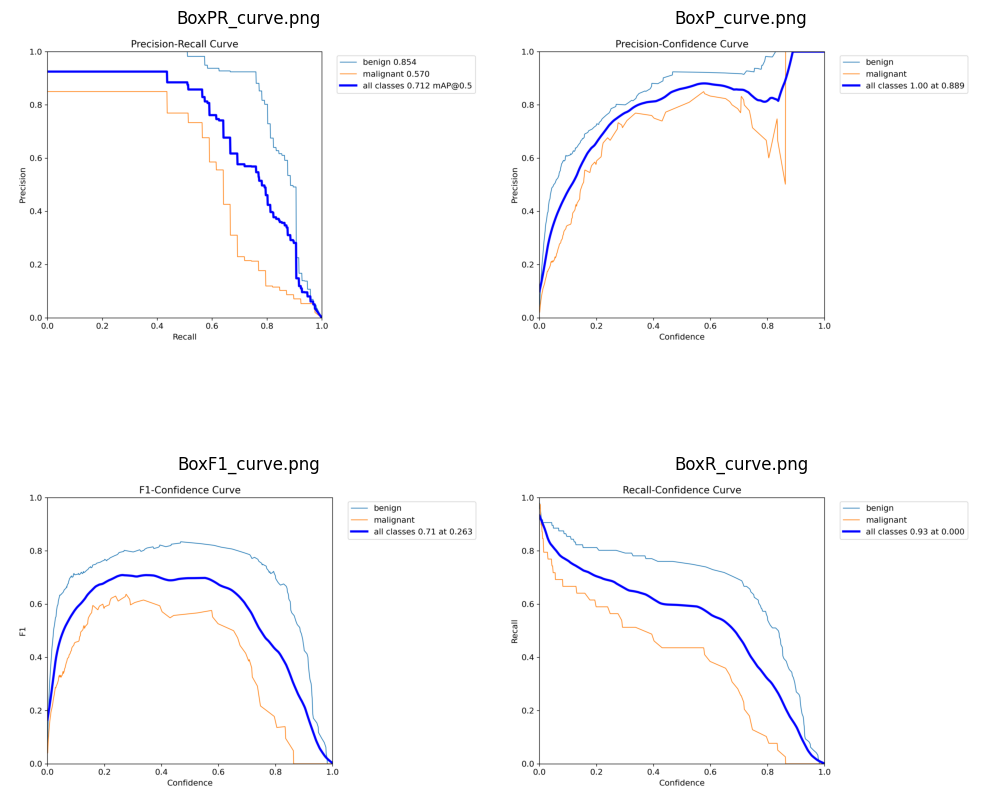

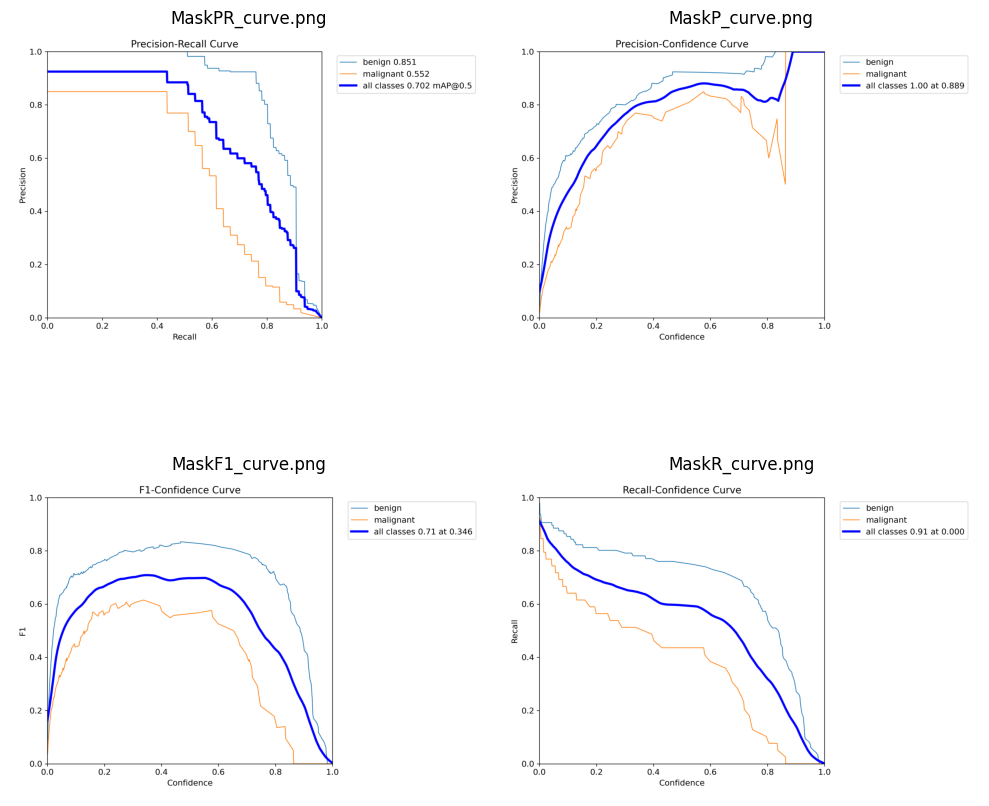

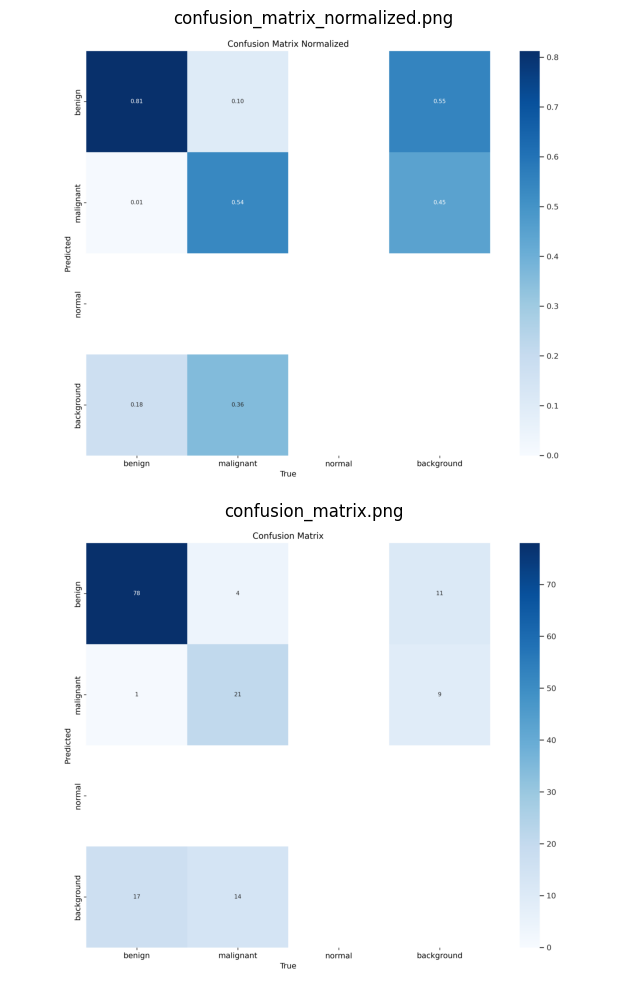

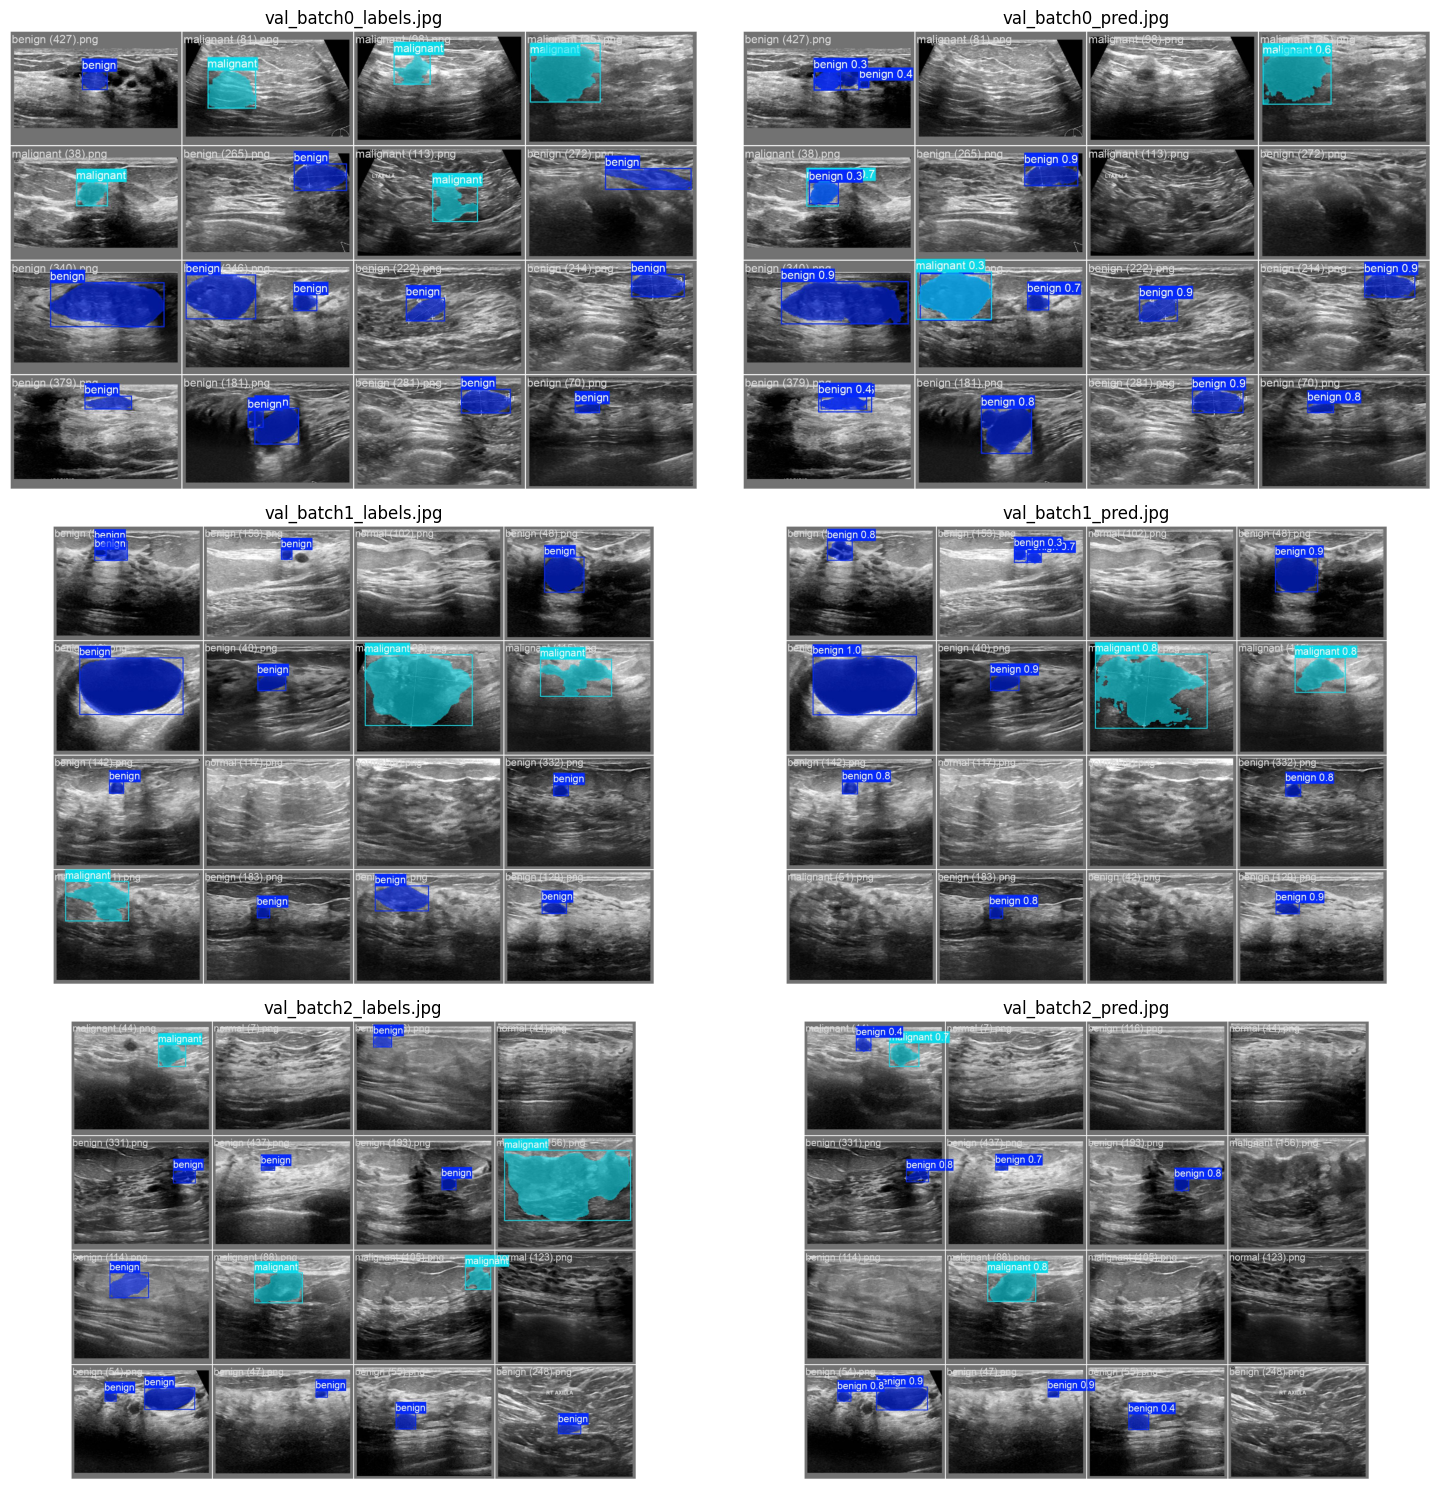

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread


# Listar todas las imágenes en el directorio
all_images = os.listdir(metrics.save_dir)

# Filtrar las imágenes según los patrones
box_images = [os.path.join(metrics.save_dir, img) for img in all_images if img.startswith('Box') and img.endswith('.png')]
mask_images = [os.path.join(metrics.save_dir, img) for img in all_images if img.startswith('Mask') and img.endswith('.png')]
confusion_images = [os.path.join(metrics.save_dir, img) for img in all_images if img.startswith('confusion') and img.endswith('.png')]
val_label_images = [os.path.join(metrics.save_dir, img) for img in all_images if 'labels' in img and img.startswith('val') and img.endswith('.jpg')]
val_pred_images = [os.path.join(metrics.save_dir, img) for img in all_images if 'pred' in img and img.startswith('val') and img.endswith('.jpg')]

# Asegurarse de que hay la misma cantidad de imágenes de etiquetas y predicciones
assert len(val_label_images) == len(val_pred_images), "Debe haber el mismo número de imágenes de etiquetas y predicciones"

# Ordenar las imágenes para asegurar que estén emparejadas correctamente
val_label_images.sort()
val_pred_images.sort()

# Crear una figura para los gráficos Box y Mask en 2x2
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Visualizar las imágenes en 2x2 para Box*.png
for i, img_path in enumerate(box_images):
    img = imread(img_path)
    axs[i // 2, i % 2].imshow(img)
    axs[i // 2, i % 2].axis('off')
    axs[i // 2, i % 2].set_title(os.path.basename(img_path))

plt.tight_layout()
plt.show()

# Crear otra figura para los gráficos Mask*.png en 2x2
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Visualizar las imágenes en 2x2 para Mask*.png
for i, img_path in enumerate(mask_images):
    img = imread(img_path)
    axs[i // 2, i % 2].imshow(img)
    axs[i // 2, i % 2].axis('off')
    axs[i // 2, i % 2].set_title(os.path.basename(img_path))

plt.tight_layout()
plt.show()

# Crear otra figura para los gráficos confusion*.png en 2x1
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Visualizar las imágenes en 1x2 para confusion*.png
for i, img_path in enumerate(confusion_images):
    img = imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(os.path.basename(img_path))

plt.tight_layout()
plt.show()

# Crear otra figura para los gráficos val_label*.jpg y val_pred*.jpg en 3x2
fig, axs = plt.subplots(len(val_label_images), 2, figsize=(15, len(val_label_images) * 5))

# Visualizar las imágenes en val_label*.jpg y val_pred*.jpg
for i, (label_img_path, pred_img_path) in enumerate(zip(val_label_images, val_pred_images)):
    label_img = imread(label_img_path)
    pred_img = imread(pred_img_path)

    # Columna 1: val_*labels.jpg
    axs[i, 0].imshow(label_img)
    axs[i, 0].axis('off')
    axs[i, 0].set_title(os.path.basename(label_img_path))

    # Columna 2: val_*pred.jpg
    axs[i, 1].imshow(pred_img)
    axs[i, 1].axis('off')
    axs[i, 1].set_title(os.path.basename(pred_img_path))

plt.tight_layout()
plt.show()



## 8. **Inference (making predictions)**

---
**Making predictions**

---

In [ ]:
# Making predictions
results = model.predict(source='BreastUltraSoundImages/images/test', save=True)



image 1/83 /content/BreastUltraSoundImages/images/test/benign (1).png: 544x640 1 benign, 22.9ms
image 2/83 /content/BreastUltraSoundImages/images/test/benign (113).png: 576x640 1 benign, 20.9ms
image 3/83 /content/BreastUltraSoundImages/images/test/benign (118).png: 608x640 1 malignant, 17.8ms
image 4/83 /content/BreastUltraSoundImages/images/test/benign (12).png: 544x640 1 benign, 15.7ms
image 5/83 /content/BreastUltraSoundImages/images/test/benign (123).png: 608x640 1 benign, 16.6ms
image 6/83 /content/BreastUltraSoundImages/images/test/benign (127).png: 576x640 1 benign, 16.1ms
image 7/83 /content/BreastUltraSoundImages/images/test/benign (138).png: 512x640 1 benign, 16.2ms
image 8/83 /content/BreastUltraSoundImages/images/test/benign (151).png: 544x640 1 benign, 18.0ms
image 9/83 /content/BreastUltraSoundImages/images/test/benign (168).png: 544x640 1 benign, 14.8ms
image 10/83 /content/BreastUltraSoundImages/images/test/benign (169).png: 544x640 1 benign, 15.0ms
image 11/83 /conte

---
**Display 9 random images from test**

---

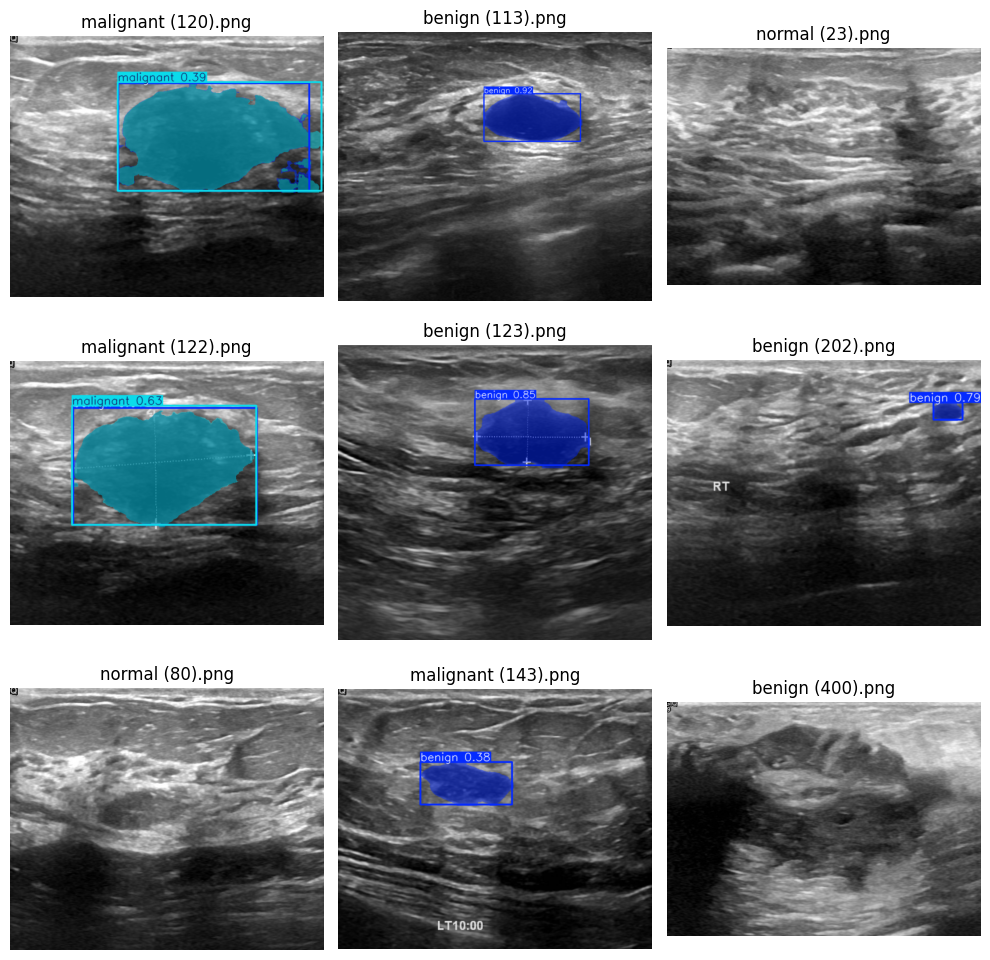

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

# Define the base directory path
base_dir = results[0].save_dir

# Get all image file paths
image_files = [f for f in os.listdir(base_dir) if f.endswith('.png')]

# Select 9 random images
selected_images = random.sample(image_files, 9)

# Create a 3x3 subplot figure
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Display the selected images
for i, image_file in enumerate(selected_images):
    image_path = os.path.join(base_dir, image_file)
    image = Image.open(image_path)
    row = i // 3
    col = i % 3
    axes[row, col].imshow(image)
    axes[row, col].axis('off')  # Turn off axis labels
    axes[row, col].set_title(image_file)  # Set title as file name


plt.tight_layout()
plt.show()